<a href="https://colab.research.google.com/github/Baasty-OCh/Miner-a-curso-/blob/Labs/ProyectoMineriaBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 1
Integrantes:
Bastián Olguín - Benjamín Indo - Javiera Valenzuela - Vicente Muñoz

# **1. Introducción (problema y motivación)**
**Contexto general del problema y el conjunto de datos**

Este conjunto de datos, titulado "Student Performance & Behavior Dataset", contiene información real de 5,000 estudiantes recopilada por un proveedor privado de educación. Incluye atributos clave relacionados con el rendimiento académico y el comportamiento de los estudiantes, como asistencia, calificaciones en exámenes, participación en actividades extracurriculares, nivel educativo de los padres, nivel de estrés, entre otros.

**¿Por qué es interesante analizar estos datos?**

Analizar este conjunto de datos es valioso porque permite explorar cómo diversos factores personales, académicos y socioeconómicos influyen en el rendimiento estudiantil. Esto puede ayudar a identificar patrones y relaciones que informen estrategias educativas, intervenciones personalizadas y políticas para mejorar los resultados académicos y el bienestar de los estudiantes.


# **2. Exploración de datos (estadísticas, patrones iniciales)**

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download(r"mahmoudelhemaly/students-grading-dataset")
# Guardamos la ruta
csv = os.path.join(path, 'Students_Grading_Dataset_Biased.csv')
# Cargamos el csv con pd
df = pd.read_csv(csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

Tipos de datos que contiene el dataset:

*   Demográficos: Student_ID, First_Name, Last_Name, Email, Gender, Age, Department.
*   Académicos: Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score, Grade.
*   Hábitos y comportamiento: Study_Hours_per_Week, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level, Stress_Level, Sleep_Hours_per_Night.



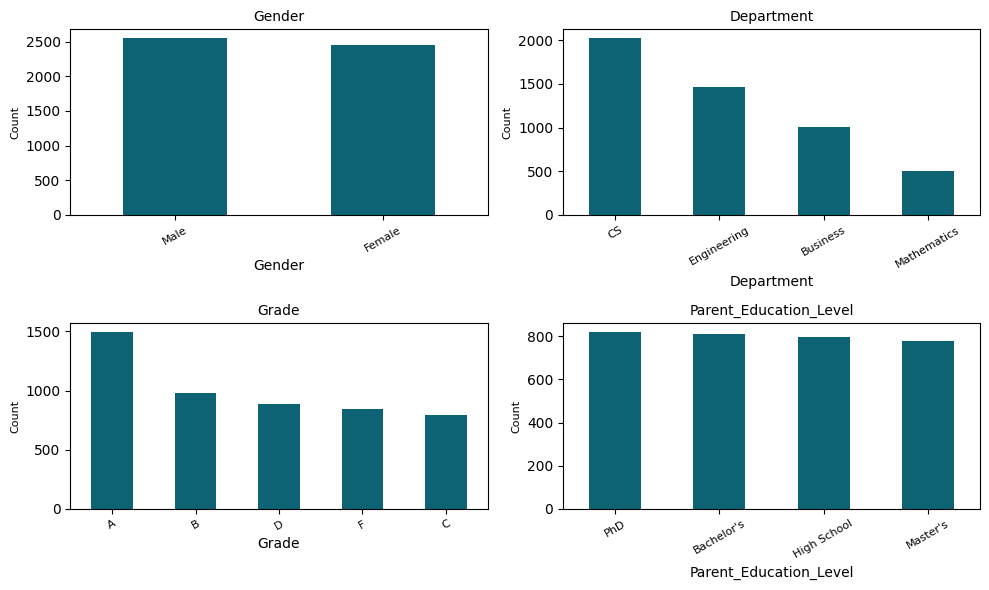

In [2]:
import matplotlib.pyplot as plt
categories = ['Gender', 'Department', 'Grade', 'Parent_Education_Level']
n_cols = 2
n_rows = (len(categories) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(categories):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='#0d6374')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
for j in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [3]:
# Algunos datos importantes del dataset
shape = df.shape
print(f"El dataset tiene {shape[0]} filas y {shape[1]} columnas")

El dataset tiene 5000 filas y 23 columnas


In [4]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [5]:
nulls = df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)

,0
Parent_Education_Level,1794
Assignments_Avg,517
Attendance (%),516


# **3. Preguntas y problemas (formulación de preguntas y posibles hipótesis)**

## Preguntas tentativas
1. ¿Se puede predecir la nota final de los alumnos en base a la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche?**[Aprendizaje supervisado (regresión)]**

  Esta pregunta es clave para entender cómo los hábitos académicos y de vida cotidiana impactan directamente en el rendimiento de los estudiantes. Identificar relaciones claras entre estas variables y la nota final permitiría optimizar métodos de estudio y mejorar el rendimiento general con recomendaciones prácticas.
2. ¿Es posible predecir la calificación final (Grade) de un estudiante en función de sus hábitos de estudio, asistencia, participación en actividades extracurriculares y factores socioeconómicos? **[Aprendizaje supervisado (clasificación)]**

  Analizar esta relación permite comprender el efecto combinado de elementos académicos y del entorno personal en el desempeño de los estudiantes.
  Esta información puede ser muy útil para diseñar políticas de apoyo más efectivas, especialmente para alumnos en condiciones desfavorables.

  Esta pregunta es parecida a la anterior pero aquí lo que se busca predecir es la calificación final, que es una es categórica marcada en letras (A-B-C-D-E-F)
3.¿Existen grupos de estudiantes con comportamientos y rendimientos académicos similares? **[Aprendizaje No supervisado (clustering)]**

  Identificar grupos con patrones comunes en su rendimiento y comportamiento ayuda a personalizar estrategias educativas, crear programas específicos para distintos perfiles estudiantiles y mejorar la gestión del aprendizaje a nivel institucional.


# **4. Propuesta experimental (estrategia metodológica)**

## Estrategia Metodológica
### ANTES DE TODO: Preprocesamiento de Datos
Antes de aplicar cualquier modelo, es esencial realizar un proceso de **limpieza de datos**. Esto incluye la gestión de valores faltantes y la trasnformación adecuada de variables según sea necesario. Además, es importante **escalar los datos** para evitar problemas de rendimiento en los modelos.

###1. Predicción de Notas Finales
Para predecir las **notas finales** de los estudiantes, utilizando factores como la asistencia, nota de tareas, nota de quizzes, nota de participación, horas de estudio por semana y horas de sueño por noche, se utilizarán modelos de **aprendizaje supervisado**. Los modelos seleccionados son:

- **Regresión Lineal**: Para modelar la relación lineal entre las variables independientes y la nota final.
- **Random Forest**: Para capturar las relaciones no lineales.

La evaluación de estos modelos se realizará mediante las siguientes métricas:

- **RMSE**: Para medir la diferencia entre los valores predichos y los reales.
- **R²**: Para evaluar el porcentaje de variabilidad explicada por el modelo.

###2. Predicción de Calificación Final
Para predecir la **calificación final** (A-B-C-D-E-F), se utilizarán modelos de clasificación ya que la variable objetivo es categórica. Los modelos a utilizar serán los siguientes:
-**Árboles de decisión**: Para ver qué reglas siguen los atributos que determinan la calificación
- **Random Forest**
- **Support Vector Machine (SVM)**
Las métricas de evaluación para estos modelos serán:
- **Acuracy**: Para medir el porcentaje de predicciones correctas.
- **Precision**: Para evaluar la precisión de la clasificación.
- **Recall**: Para medir el porcentaje de casos positivos detectados.

###3. Identificación de Grupos de Estudiantes
Para encontrar **grupos de estudiantes** con comportamientos y rendimientos académicos similares, se utilizaran técnicas de **aprendizaje no supervisado** (clustering) :
- **K-means**: Algoritmo de clustering que agrupa a los estudiantes en k-grupos basados en la similitud de sus características
- **DBSCAN**: Algoritmo basado en densidad que identifica clusters de estudiantes en áreas donde hay mayor concentración de datos.


# **5. Experimento preliminar (implementación)**

In [6]:
# Pregunta 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
df_standar = df.copy()
# Definir las columnas numéricas para escalar
numerical_cols = ['Attendance (%)', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                  'Study_Hours_per_Week', 'Stress_Level (1-10)']

# Rellenar los valores nulos con la media de cada columna
df_standar[numerical_cols] = df_standar[numerical_cols].fillna(df_standar[numerical_cols].mean())
# Crear una instancia de StandardScaler
scaler = StandardScaler()
# Ajustar el scaler a las variables numéricas y transformarlas
df_standar[numerical_cols] = scaler.fit_transform(df_standar[numerical_cols])
X = df_standar[numerical_cols]
y = df_standar['Final_Score']  # Asegúrate de que la columna 'Final_Score' esté presente
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Inicializar el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcular RMSE manualmente
r2 = r2_score(y_test, y_pred)  # R² Score
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(numerical_cols, model.coef_):
    print(f"{feature}: {coef}")

Root Mean Squared Error (RMSE): 17.14045246440894
R² Score: -0.006116451987074667

Coeficientes del modelo:
Attendance (%): -0.33666609014322
Assignments_Avg: 0.37299600068899164
Quizzes_Avg: 0.39764694090297015
Participation_Score: 0.36281774228623054
Study_Hours_per_Week: 0.24881552711048585
Stress_Level (1-10): 0.16918424595191536


# **6. Análisis de resultados y discusión**

Es curioso el resultado preliminar de este experimento, ya que se obtiene en primer lugar valores muy pequeño para cada categoria, lo cual indica que en realidad hay poca variabilidad en el resultado (final score) con respecto al nivel de el parametro.
En particular es llamativo como a el modelo sugiere que, a menor asistencia a clases mejores calificaciones se tienen.

Por otro lado como el R^2 es tan cercano a cero (de hecho negativo) por ende menor a este valor, podemos afirmar que el rendimiento del modelo es peor incluso que solo haber sacado los promedios de las categorias y pronosticar en base a eso.

En busca de una explicación al porqué el modelo de regresión lineal tuvo tan mal desempeño, graficamos la asistencia vs el final score.
Para toda la muestra y luego segmentado por departamentos. (CS, Engineering, Mathematics and Business)

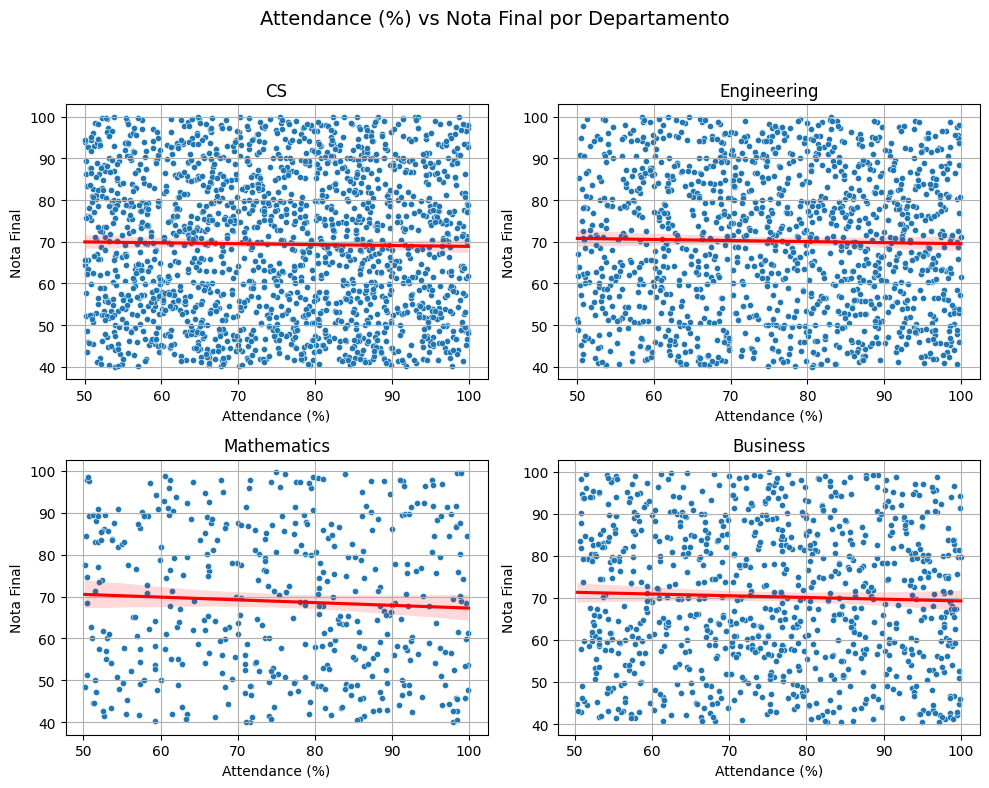

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la variable que queremos graficar
col = 'Attendance (%)'

# Crear una copia del DataFrame y agregar Final_Score
df_plot = df.copy()
df_plot['Final_Score'] = y

# Lista de departamentos
departamentos = ['CS', 'Engineering', 'Mathematics', 'Business']

# Crear figura general con 2 filas × 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # tamaño total ajustable
fig.suptitle(f'{col} vs Nota Final por Departamento', fontsize=14)
axes = axes.flatten()

# Graficar en cada subplot
for i, dept in enumerate(departamentos):
    df_dept = df_plot[df_plot['Department'] == dept]
    ax = axes[i]

    sns.scatterplot(x=col, y='Final_Score', data=df_dept, ax=ax, s=20)
    sns.regplot(x=col, y='Final_Score', data=df_dept, scatter=False,
                line_kws={"color": "red"}, ax=ax)

    ax.set_title(f'{dept}')
    ax.set_xlabel(col)
    ax.set_ylabel('Nota Final')
    ax.grid(True)

# Ajustar espaciado general
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Aquí podemos ver como la tendencia, salvo en el caso del departamento de Matematicas (aunque igual es muy tenue) es casi inexistente, esto explica a priori el por qué la regresion tuvo tan mal resultado como modelo predictor, por que en esencia los datos no siguen aquella tendencia.

La propuesta ahora para poder mejorar el desempeño del modelo, sería 'linealizar' los datos, combinando categorías entre sí, en busca de que unidas de manera estrategica si nos permitan encontrar una tendencia, con la cual entrenar al modelo y así finalmente usarlo para predecir de manera mas fiable.

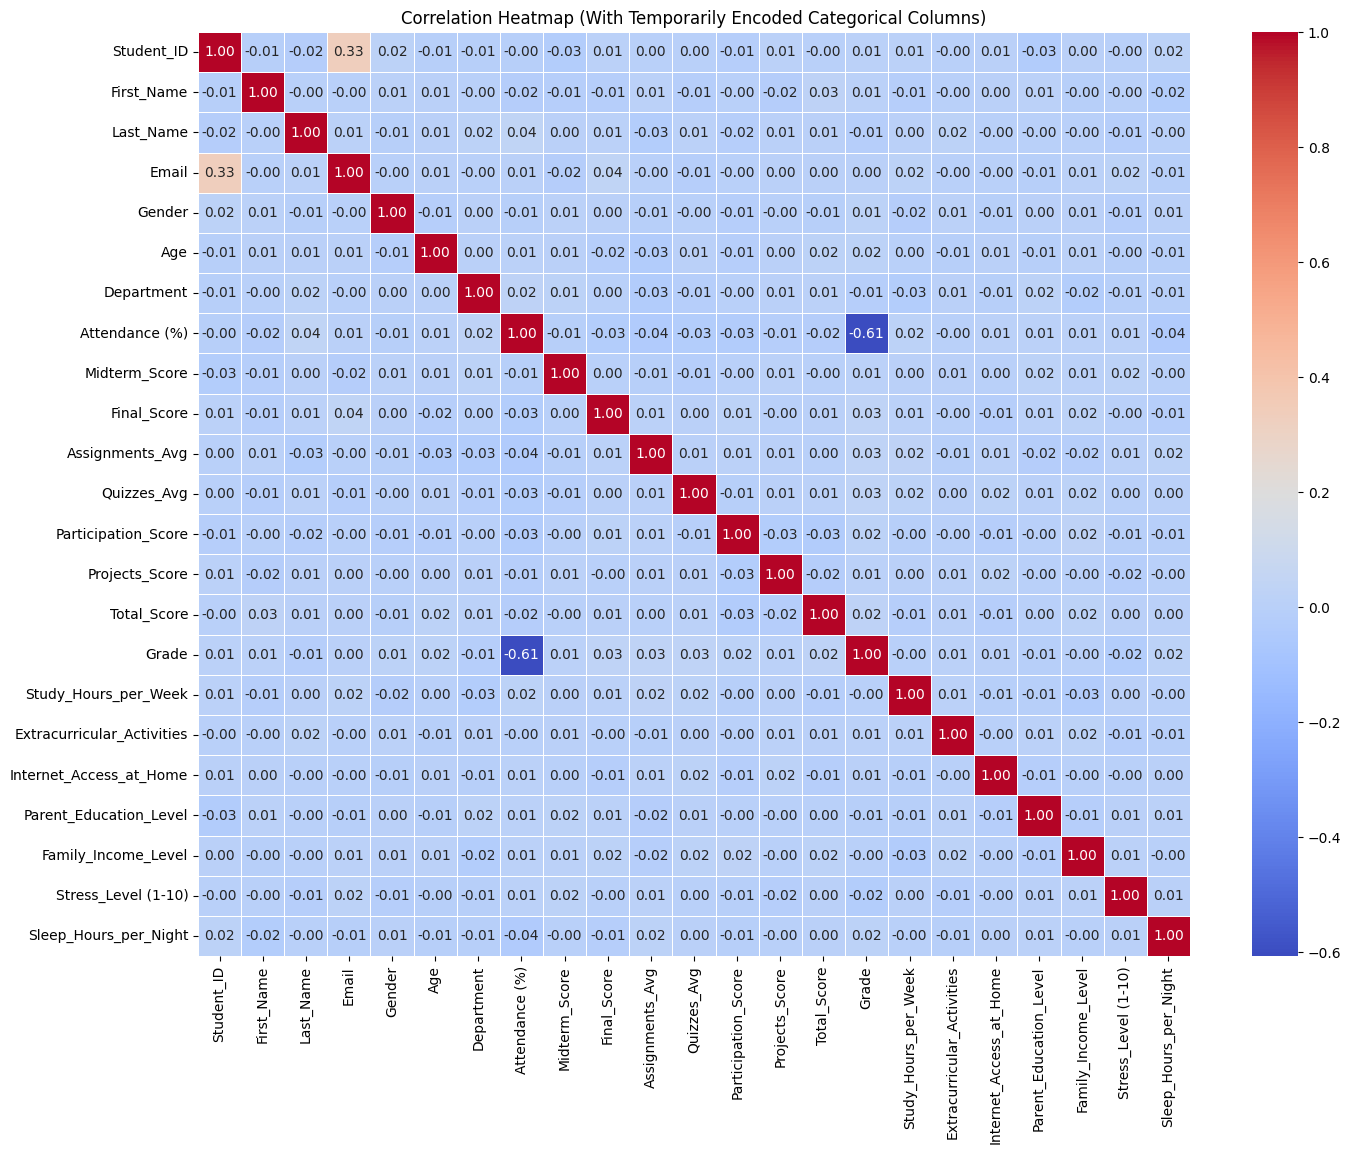

🔍 Top Correlated Column Pairs:
               Feature 1              Feature 2  Correlation
176       Attendance (%)                  Grade    -0.607110
69                 Email             Student_ID     0.332444
237      Assignments_Avg         Attendance (%)    -0.037872
210          Final_Score                  Email     0.036356
183       Attendance (%)  Sleep_Hours_per_Night    -0.036312
53             Last_Name         Attendance (%)     0.036078
334          Total_Score    Participation_Score    -0.034289
476  Family_Income_Level   Study_Hours_per_Week    -0.033361
125                  Age        Assignments_Avg    -0.033268
173       Attendance (%)    Participation_Score    -0.029839


In [8]:
from sklearn.preprocessing import LabelEncoder

# Copy original dataframe to avoid modifying it permanently
df_temp = df.copy()

# Apply Label Encoding only temporarily
label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le  # Store encoder for future reference

# Compute the correlation matrix
correlation_matrix = df_temp.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Find the top correlated column pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations (correlation of a feature with itself)
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("🔍 Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs

# Revert back to original categorical values
for col, le in label_encoders.items():
    df_temp[col] = le.inverse_transform(df_temp[col])

# Pregunta 2


In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Attendance (%),516
Assignments_Avg,517
Parent_Education_Level,1794


## Vemos que hay algunos datos que son nulos, por lo que vamos a tener que hacer una limpieza.
Vamos a rellenar estos datos faltantes con la media, haremos un map de las variables ordinales/categóricas y luego vamos a definir X e Y.

In [10]:
df2 = df.copy()
Parent_Education_Level_Map = {
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}
Family_Income_Level_Map = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}
Internet_Access_at_Home_Map = {
    'No': 0,
    'Yes': 1
}
Extracurricular_Activities_Map = {
    'No': 0,
    'Yes': 1
}
Grade_Map = {'F': 1, 'D': 2, 'C': 3, 'B': 4, 'A': 5}

df2['Parent_Education_Level'] = df2['Parent_Education_Level'].fillna('PhD')  # o usar la moda
#Hacemos el map para usar variables numéricas
df2['Parent_Education_Level'] = df2['Parent_Education_Level'].map(Parent_Education_Level_Map)
df2['Family_Income_Level'] = df2['Family_Income_Level'].map(Family_Income_Level_Map)
df2['Internet_Access_at_Home'] = df2['Internet_Access_at_Home'].map(Internet_Access_at_Home_Map)
df2['Extracurricular_Activities'] = df2['Extracurricular_Activities'].map(Extracurricular_Activities_Map)
df2['Grade'] = df2['Grade'].map(Grade_Map)
df2['Attendance (%)'] = df2['Attendance (%)'].fillna(df2['Attendance (%)'].median())

X = df2[['Parent_Education_Level', 'Family_Income_Level',
         'Internet_Access_at_Home', 'Extracurricular_Activities', 'Study_Hours_per_Week', 'Attendance (%)']]
y = df2['Grade']




## Variables a utilizar:
Para X serán las siguientes:
- Parent_Education_Level
- Family_Income_Level
- Internet_Access_at_Home
- Extracurricular_Activities
- Study_Hours_per_Week
- Attendance (%)
Y la variable objetivo será:
- Grade

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {}
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight = 'balanced'),
    'SVM': SVC(random_state=42)
}
for name, model in models.items():
    if name == 'SVM':
        # Escalar los datos solo para SVM
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name]={
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"{name} Results:")
    print(classification_report(y_test,y_pred))
# Ordenar y mostrar resultados por cada métrica
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    print(f"--- Model ranking by {metric} ---")
    sorted_results = sorted(results.items(), key=lambda x: x[1][metric], reverse=True)
    for name, metrics in sorted_results:
        print(f"{name}: {metrics[metric]:.4f}")
    print()

Decision Tree Results:
              precision    recall  f1-score   support

           1       0.29      0.26      0.28       185
           2       0.33      0.29      0.31       176
           3       0.21      0.20      0.20       161
           4       0.25      0.29      0.27       180
           5       0.53      0.56      0.54       298

    accuracy                           0.35      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.35      0.35      0.35      1000

Random Forest Results:
              precision    recall  f1-score   support

           1       0.28      0.21      0.24       185
           2       0.26      0.29      0.27       176
           3       0.22      0.24      0.23       161
           4       0.17      0.14      0.15       180
           5       0.54      0.61      0.57       298

    accuracy                           0.34      1000
   macro avg       0.29      0.30      0.29      1000
weighted avg       0.32      0.

## Conclusión
Tras evaluar los tres modelos de clasificación (Decision Tree, Random Forest y SVM) sobre el mismo conjunto de datos se observan algunas diferencias entre cada métrica de evaluación, sin embargo, ninguna destaca en alguno en específico.

| Modelo         | Accuracy | Precision | Recall | F1 Score |
|----------------|----------|-----------|--------|----------|
| SVM            | 0.3710   | 0.3092    | 0.3710 | 0.3170   |
| Decision Tree  | 0.3510   | 0.3477    | 0.3510 | 0.3486   |
| Random Forest  | 0.3360   | 0.3227    | 0.3360 | 0.3271   |

Los valores globales de accuracy, precision, recall y F1 score son relativamente bajos, siendo todos menores a 0.40, lo que está indicando que el problema de clasificación es complejo y los modelos no están logrando un buen desempeño general.
Sin embargo, esto cambia para la clase 5 (grade=A) por lo que nos surge la pregunta de si el modelo mejorará cambiando el enfoque en predecir si el grade de un estudiante será A.

In [12]:
# Crear variable binaria para "¿nota A?"
y_binary = (df2['Grade'] == 5).astype(int)

# Dividir en train/test (con stratify para balancear)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

for name, model in models.items():
    if name == 'SVM':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    print(f"{name} Results:")
    print(classification_report(y_test,y_pred))
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc_auc:.4f}\n")

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       701
           1       0.52      0.55      0.53       299

    accuracy                           0.71      1000
   macro avg       0.66      0.67      0.66      1000
weighted avg       0.72      0.71      0.71      1000



NameError: name 'roc_auc_score' is not defined

## Conclusión

| Modelo         | Accuracy | Precision (weighted) | Recall (weighted) | F1 Score (weighted) | ROC AUC  |
|----------------|----------|----------------------|-------------------|---------------------|----------|
| Decision Tree  | 0.71     | 0.72                 | 0.71              | 0.71                | 0.6651   |
| Random Forest  | 0.77     | 0.76                 | 0.77              | 0.76                | 0.7905   |
| SVM            | 0.77     | 0.76                 | 0.77              | 0.76                | 0.7596   |

Los tres modelos presentan un desempeño razonable al predecir solamente si un alumno tendrá nota A o no.
En base a la tabla, podemos decir que Random Forest es el modelo más equilibrado y robusto, ya que tiene los mejores valores para las métricas de evaluación.

No obstante, es importante destacar que el desempeño en la clase minoritaria (alumnos con nota A), sigue siendo relativamente bajo. Esto indica que los modelos son mejores para identificar alumnos que no alcanzarán una nota A, que para los que sí alcanzarán una A.

## ¿Cómo se podría usar este modelo?
1. **Identificación temprana de estudiantes en riesgo:**
Aunque el modelo no predice con alta precisión quien tendrá una nota A, puede ser útil para detectar estudiantes que probablemente no alcancen el máximo rendimiento. Esto permite a los docentes ofrecer apoyo específico a quienes más lo necesiten.
2. **Optimización de recursos educativos:**
  Con base a lo anterior, se pueden enfocar recursos y materiales educativos en estos estudiantes para ayudarlos a mejorar su rendimiento.
3. **Orientación académica personalizada:**
  Al identificar alumnos en riesgo de no obtener una A, se pueden aplicar planes de estudio diferenciado y reforzar las áreas en las que presenten dificultades.